# Trajectographie de la station spatiale internationale

L'objectif de cette séance est de:
- concevoir et développer une chaîne logicielle capture/traitement/affichage;
- manipuler différentes bibliothèques Python spécialisées;
- factoriser les traitements développés dans les séances précédentes pour les réutiliser aujourd'hui.

Nous allons utiliser, dans la bibliothèque standard, notamment:
- le module `datetime` pour la gestion intuitive du temps;
- le module `urllib` pour la récupération de données sur Internet;

Parmi les bibliothèques non officielles mais au statut standard:
- le module `numpy` pour la gestion des tableaux de données;
- le module `matplotlib` pour l'affichage;

Nouveauté pour cette séance, le module [`skyfield`](http://rhodesmill.org/skyfield/) spécialisé dans les traitements appliqués à l'astronomie.

<img src="img/iss_sun.jpeg" style="width:10cm"/>

In [1]:
from skyfield.api import load, utc
ts = load.timescale()
# chargement des éphémérides
planets = load('de421.bsp')

In [2]:
earth = planets['earth']
sun = planets['sun']
moon = planets['moon']

Des méthodes peuvent être enchaînées sur les corps célestes présents dans `planets`.

In [3]:
# Position de la Terre au 1er janvier 2017
earth.at(ts.utc(2017, 1, 1))

<Barycentric position and velocity at date t>

La méthode `utc` permet d'entrer des données temporelles manuellement, mais aussi d'utiliser le module `datetime` de Python.  
Dans ce cas, il faut spécifier le fuseau horaire!

In [4]:
import datetime
now = datetime.datetime.now(utc)
now

datetime.datetime(2017, 2, 1, 17, 48, 39, 463060, tzinfo=<UTC>)

In [5]:
# Position relative du soleil par rapport à la Terre au 1er janvier 2017, 12h10
earth.at(ts.utc(now)).observe(sun)

<Astrometric position and velocity at date t>

<div class="alert alert-warning">
**Avant d'aller plus loin.** Nous voyons sur les représentations des deux positions précédentes les termes *position et vitesse barycentrique* et *position et vitesse astrométrique*. Avant de manipuler ces notions, il conviendra de faire un rappel sur différents systèmes de coordonnées.
</div>

## Les systèmes de coordonnées

Pour manipuler des objets spatiaux, il convient d'être familier avec différents systèmes de coordonnées. Nous allons manipuler trois systèmes de coordonnées:

1. le système de coordonnées équatoriales (global), qui manipule *ascension droite* et *déclinaison* ;
2. le système de coordonnées horizontales (local), qui manipule *hauteur* (altitude en anglais) et *azimuth* ;
3. le système global GCRS (geocentric coordinates referential system), qui spécifie la position en coordonnées cartésiennes $(x, y, z)$ d'objets proches de la Terre (comme les satellites).

### Le système de coordonnées équatoriales

(source Wikipedia)

Le système de coordonnées équatoriales est un système de coordonnées célestes dont les valeurs sont **indépendantes de la position de l'observateur**. Ce système utilise comme plan de référence la projection, sur la sphère céleste, de l'équateur de la Terre. Cette projection est l'équateur céleste, qui divise le ciel en deux hémisphères, chacun ayant comme axe de référence la projection d'un pôle terrestre, perpendiculaire à l'équateur céleste. À partir de ces divisions, le système permet d'établir deux coordonnées angulaires : l'**ascension droite** et la **déclinaison**.

- L'**ascension droite** α est l'angle mesuré sur l'équateur céleste à partir d'un point de référence, le point vernal, correspondant à une intersection entre l'équateur céleste et l'écliptique. À partir de ce point, l'angle est mesuré vers l'Est et comporte 24 divisions principales de 15 degrés chacune, nommées « heures ». Chacune des heures se divise en minutes et en secondes.
-  La **déclinaison** δ est l'angle mesuré perpendiculairement entre l'équateur céleste et l'objet céleste observé. Elle se mesure en degrés, positifs pour les objets situés dans l'hémisphère nord et négatifs pour ceux de l'hémisphère sud. La déclinaison varie ainsi de -90° (pôle sud) à +90° (pôle nord) en passant par 0° à l'équateur céleste.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/98/Ra_and_dec_on_celestial_sphere.png" style="width:10cm"/>

<div class="alert alert-warning">
**Exercice :** Procéder par dichotomie sur une année pour annuler la déclinaison du soleil.<br />
Quelle est alors son ascension droite? Rapporter cette valeur au sens du mot [*vernal*](http://www.cnrtl.fr/definition/vernal).</div>

In [6]:
earth.at(ts.utc(now)).observe(sun).radec()

(<Angle 21h 01m 11.80s>, <Angle -16deg 57' 30.4">, <Distance 0.985473 au>)

In [7]:
# -- cut here --
earth.at(ts.utc(2017, 9, 23, 2)).observe(sun).radec()

(<Angle 12h 00m 01.06s>, <Angle -00deg 00' 05.3">, <Distance 1.00349 au>)

In [8]:
# -- cut here --
earth.at(ts.utc(2017, 3, 20, 17 )).observe(sun).radec()

(<Angle 00h 00m 08.27s>, <Angle +00deg 00' 53.2">, <Distance 0.996014 au>)

<div class="alert alert-warning">
**Exercice :** Mettre en évidence la latitude des tropiques à partir de la déclinaison du soleil à une date particulière.</div>

In [9]:
# -- cut here --
earth.at(ts.utc(2017, 6, 21)).observe(sun).radec()

(<Angle 05h 58m 12.54s>, <Angle +23deg 26' 10.1">, <Distance 1.01625 au>)

In [10]:
# -- cut here --
earth.at(ts.utc(2017, 12, 22)).observe(sun).radec()

(<Angle 18h 00m 20.34s>, <Angle -23deg 26' 12.6">, <Distance 0.983739 au>)

<div class="alert alert-success">
**Réponse attendue :** Les deux tropiques du Cancer et du Capricorne sont à une latitude de ± 23° 26' 14".
</div>

### Le système de coordonnées horizontales

(source Wikipedia)

Le système de coordonnées horizontales, également appelé **système local** ou système de coordonnées alt-azimutales, est un système de coordonnées célestes utilisé en astronomie **par un observateur au sol**. Le système sépare le ciel en deux hémisphères : l'un situé au-dessus de l'observateur et l'autre situé au-dessous, caché par le sol. Le grand cercle séparant les deux hémisphères situe le plan horizontal, à partir duquel est établi une altitude et un azimut, qui constituent les deux principales coordonnées de ce système.

- L'**angle d'élévation**, ou la hauteur (h), est l'angle vertical entre le plan horizontal et l'objet visé. Il varie entre 0° (horizon) et 90° (zénith). Il est cependant possible d'obtenir des valeurs négatives lors d'une observation à partir d'un lieu élevé. Le point situé aux pieds de l'observateur (-90°) est appelé le nadir.
- L'**azimut** (A) est déterminé par l'angle entre le nord ou le sud géographiques et la projection de la direction de l'objet observé sur le plan horizontal. Les azimuts sont généralement numérotés de 0° à 360° dans le sens horaire à partir point cardinal choisi.


<div class="alert alert-warning">
**Exercice :** Calculer l'azimut du Soleil le 1er janvier à midi (heure locale) à Paris, Berlin, Tokyo et Buenos Aires.<br />
Le fuseau horaire de ces villes est-il « bien choisi » par rapport à l'heure locale. Et en heure d'été ?
</div>

Pour l'heure d'été, nous pourrons effectuer les mêmes calculs le 1er juillet. 

In [11]:
from collections import namedtuple

import pytz

city = namedtuple('city', ['coords', 'winter', 'summer'])
fmt = '%H:%M:%S %Z %z'
msg = "Midi à {} ({}): azimuth de {:0.02f} deg"

timezones = {
    # ORY
    'Europe/Paris': city(coords=(48.725278, 2.359444), winter=1, summer=2),
    # SXF
    'Europe/Berlin': city(coords=(52.380001, 13.52258), winter=1, summer=2),
    # LHR
    'Europe/London': city(coords=(51.4775, -0.461389), winter=0, summer=1),
    # HND
    'Asia/Tokyo': city(coords=(35.552258, 139.779694), winter=9, summer=9),
    # EZE
    'America/Buenos_Aires': city(coords=(-34.822222, -58.535833), winter=-3, summer=-3)
}

print("Heures d'hiver:")
for tz, city in timezones.items():
    noon = datetime.datetime(2017, 1, 1, 12 - city.winter, tzinfo=utc)
    # -- cut here --
    _, az, _ = earth.topos(*city.coords).at(ts.utc(noon)).observe(sun).apparent().altaz()
    print(msg.format(tz, noon.astimezone(pytz.timezone(tz)).strftime(fmt), az.degrees))
    
print()

print("Heures d'été:")
for tz, city in timezones.items():
    if 'Europe' not in tz: continue
    noon = datetime.datetime(2017, 7, 1, 12 - city.summer, tzinfo=utc)
    # -- cut here --
    _, az, _ = earth.topos(*city.coords).at(ts.utc(noon)).observe(sun).apparent().altaz()
    print(msg.format(tz, noon.astimezone(pytz.timezone(tz)).strftime(fmt), az.degrees))


Heures d'hiver:
Midi à America/Buenos_Aires (12:00:00 ART -0300): azimuth de 50.58 deg
Midi à Asia/Tokyo (12:00:00 JST +0900): azimuth de 184.21 deg
Midi à Europe/Paris (12:00:00 CET +0100): azimuth de 166.94 deg
Midi à Europe/London (12:00:00 GMT +0000): azimuth de 178.68 deg
Midi à Europe/Berlin (12:00:00 CET +0100): azimuth de 177.73 deg

Heures d'été:
Midi à Europe/Paris (12:00:00 CEST +0200): azimuth de 128.34 deg
Midi à Europe/London (12:00:00 BST +0100): azimuth de 149.75 deg
Midi à Europe/Berlin (12:00:00 CEST +0200): azimuth de 148.82 deg


<div class="alert alert-info">
**Indice :** L'explication de ce décallage est historique et date du XXe siècle !
</div>
Pour les moins courageux, la solution est visible [ici](https://www.slate.fr/story/79264/heure-hiver-allemagne-france-occupation).

<div class="alert alert-warning">
**Exercice :** Comment l'azimut de la Lune et celui du Soleil sont-ils liés aux phases de la Lune telles qu'on les voit sur Terre ?<br />
Calculer les phases de la Lune pour tous les jours du mois courant.
</div>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

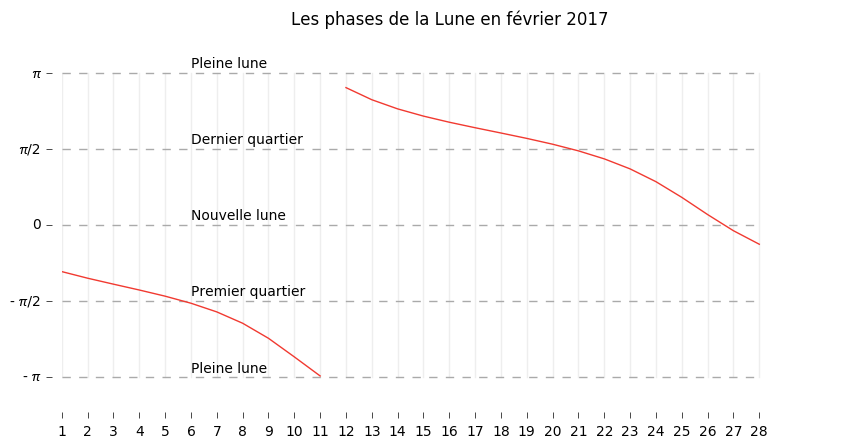

In [13]:
# -- cut here --

today = datetime.date.today()

# Combien y a-t-il de jours ce mois-ci ?
import calendar
_, total_days = calendar.monthrange(today.year, today.month)

# La Lune observée à Paris
paris = earth.topos(*timezones['Europe/Paris'].coords)

stack=[]
for day in range(1, total_days+1):
    dt = ts.utc(datetime.date(today.year, today.month, day))
    _, moon_az, _ = paris.at(dt).observe(moon).apparent().altaz()
    _, sun_az, _ = paris.at(dt).observe(sun).apparent().altaz()
    stack.append(moon_az.radians - sun_az.radians)
    
# Revenir entre -π et π
stack = np.angle(np.exp(1j*np.array(stack)))
# Détecter le premier passage de -π à π
wh = np.where(np.abs(stack[1:]-stack[:-1]) > np.pi)[0][0]

fig = plt.figure()
ax = fig.gca()

# Un trait vertical par jour
for i in range(total_days):
    ax.plot([i,i], [-np.pi, np.pi], color='#eeeeee')

# Un trait horizontal par phase principale
pi = np.zeros(stack.size)
phase = ['Pleine lune', 'Premier quartier', 'Nouvelle lune',
         'Dernier quartier', 'Pleine lune']

for i in range(5):
    plt.plot((i-2)*np.pi/2 + pi, '--', color="#aaaaaa")
    plt.annotate(phase[i], (5, (i-2)*np.pi/2 + .1), )

# L'angle d'éclairage sur la Lune, vue de la Terre
plt.plot(list(range(wh+1)), stack[:wh+1], color="#f13a31")
plt.plot(list(range(wh+1, total_days)), stack[wh+1:], color="#f13a31")

# Les axes
ax.set_xticks(list(range(total_days)))
ax.set_xticklabels(list(range(1, total_days+1)))
ax.xaxis.set_ticks_position('bottom')

ax.set_yticks([(i-2)*np.pi/2 for i in range(5)])
ax.set_yticklabels(["- π", "- π/2", "0", "π/2", "π"])
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.02))

# Une figure plus large pour pouvoir lire un mois complet
fig.set_size_inches(10, 5)

# Le titre
month_name = [None, "janvier", "février", "mars",
              "avril", "mai", "juin","juillet", 
              "août", "septembre", "octobre", 
              "novembre", "décembre"]

ax.set_title("Les phases de la Lune en {} {}".format(month_name[today.month], today.year))
ax.set_frame_on(False)

### Le système GCRS et son lien avec latitude, longitude et temps sidéral

Le système global GCRS (geocentric coordinates referential system) spécifie la position en coordonnées cartésiennes $(x, y, z)$ d'objets proches de la Terre (comme les satellites). Les coordonnées $x$ et $y$ sont projetées sur le plan équatorial, avec $x$ qui point vers le point vernal. La coordonnées $z$ pointe elle vers le pôle Nord.

Il est relativement facile de calculer une latitude, une longitude et une altitude à partir de coordonnées $(x, y, z)$ mais il est important de connaître une heure de référence pour se repérer par rapport à une coordonnée longitudinale terrestre. N'oublions pas que le système GCRS étant indépendant de la rotation de la Terre sur elle-même.

On manipule alors le **temps sidéral** qui est à un instant et en un lieu donné l'angle horaire du point vernal.

Pour nos calculs, nous allons utiliser l'interface de la bibliothèque `geodesy` que nous avons utilisée lors de la séance précédente, ainsi que `skyfield` pour le calcul du temps sidéral. Chaque objet de type `Time` a un attribut `gmst` pour *Greenwich Mean Sidereal Time*, soit l'angle horaire au méridien de Greenwich par rapport au point vernal.

In [14]:
import geodesy.wgs84 as geo
from skyfield.api import utc

now = datetime.datetime.now(utc)
t = ts.utc(now)

sun = earth.at(t).observe(planets['sun'])
print(sun.position) # by default in astronomic units
print(sun.position.m)

lat, lon, _ = geo.cartesian_to_geodesic(*sun.position.m)
print("lat: {:.4f} deg lon: {:.4f} deg".format(lat, (lon - 15 * t.gmst))) # 15 * 24 h = 360 deg

[ 0.67000528 -0.66304458 -0.28744068] au
[  1.00231363e+11  -9.91900570e+10  -4.30005139e+10]
lat: -16.9584 deg lon: -83.9984 deg


<div class="alert alert-warning">
**Exercice :** Écrire et documenter une fonction pour recaler un angle entre -180° et 180°.
</div>

In [15]:
np.degrees(np.angle(np.exp(1j*np.radians(-350.))))

10.000000000000004

## Propagation de trajectoires d'objets en orbite

Le [NORAD](https://fr.wikipedia.org/wiki/Commandement_de_la_d%C3%A9fense_a%C3%A9rospatiale_de_l'Am%C3%A9rique_du_Nord) et la [NASA](https://fr.wikipedia.org/wiki/National_Aeronautics_and_Space_Administration) mesurent et calculent la position de satellites, stations spatiales et débris orbitaux. Ils publient leurs observations sous la forme de [`Two-Line Elements (TLE)`](https://fr.wikipedia.org/wiki/Param%C3%A8tres_orbitaux_%C3%A0_deux_lignes), qui peuvent être représentés sur le modèle de la ligne suivante (pour l'exemple de la station spatiale internationale):

```
ISS (ZARYA)             
1 25544U 98067A   14273.50403866  .00012237  00000-0  21631-3 0  1790
2 25544  51.6467 297.5710 0002045 126.1182  27.2142 15.50748592907666
```

Le format est décrit sur la [page Wikipedia relative aux TLE](https://fr.wikipedia.org/wiki/Param%C3%A8tres_orbitaux_%C3%A0_deux_lignes). Le détail est intéressant mais n'aura pas grande importance pour nous: nous allons utiliser une bibliothèque qui lit ce format pour propager la trajectoire des objets et donner leur position à un moment donné.

Le minimum à savoir est que:

- la 1re ligne donne le nom de l'objet (ici `ISS` pour *International Space Station*);
- les deux lignes suivantes donnent toutes les informations relatives aux paramètres orbitaux de l'objet à un moment donné. Le 4e élément de la ligne préfixée par `1`, ici `14273.50403866` donne le $t_0$ pour la propagation. Les deux premiers chiffres (14) font référence à l'année (2014), la suite est le jour de l'année (273.50403866), soit le 273e jour de l'année (30 septembre).

Nous allons utiliser un code de propagation de trajectoires qui utilise un modèle numérique nommé [SGP4](https://en.wikipedia.org/wiki/SGP4). Celui-ci est précis pendant quelques heures à partir du $t_0$; il est alors important de mettre régulièrement à jour les données depuis cette [page](http://celestrak.com/NORAD/elements).

In [16]:
# for the example
iss = earth.satellite("""
ISS (ZARYA)             
1 25544U 98067A   14273.50403866  .00012237  00000-0  21631-3 0  1790
2 25544  51.6467 297.5710 0002045 126.1182  27.2142 15.50748592907666
""")
iss

<EarthSatellite number=25544 epoch=2014-09-30T12:05:49Z>

In [17]:
# compute present position (makes no sense after so many years...)
iss.gcrs(ts.utc(now)).position.m

array([ 5028009.023266  , -1400429.8457807 ,  4165811.12308128])

<div class="alert alert-warning">
**Exercice**: Utiliser le module `urllib` pour télécharger la dernière version des TLE pour la station spatiale internationale.
</div>

In [18]:
import urllib.request as urlrequest
result = urlrequest.urlopen("http://celestrak.com/NORAD/elements/stations.txt")
assert result.getcode() == 200, "Page not found"
s = result.read().splitlines()
assert s[0].strip() == b"ISS (ZARYA)"
iss = earth.satellite("\n".join(t.decode() for t in s[:3]))

<div class="alert alert-warning">
**Exercice:** Afficher une carte du monde en projection de Mercator et la trace au sol de la station spatiale internationale.<br />
Comparer votre résultat à la carte affichée sur <a href="http://www.n2yo.com/">www.n2yo.com</a>.
</div>

In [19]:
shapefile_path = "../../data/CNTR_2014_03M_SH/Data/CNTR_RG_03M_2014.shp"

import fiona
import numpy as np

from descartes import PolygonPatch
from shapely.geometry import MultiPolygon, Polygon, shape

import geotools.projection as prj

def world_map(projection, shapefile_path = shapefile_path):

    items = [p for p in fiona.open(shapefile_path)]
    shapes = [shape(i['geometry']) for i in items if i['properties']['CNTR_ID'] != 'AQ']

    polygons = []
    for s in shapes:
        if s.geom_type == "Polygon":
            s = MultiPolygon([s])
        for idx, p in enumerate(s):
            lon = np.array([lon for (lon, _) in list(p.exterior.coords)])
            lat = np.array([lat for (_, lat) in list(p.exterior.coords)])
            x, y = projection(lon, lat)
            polygons.append(Polygon([a for a in zip(x, y)]))
    
    return polygons

mercator = world_map(prj.sph2merc)

In [20]:
def trajectory(ax, now, iss):
    """Plots the trajectory of the ISS on ax."""
    # Trajectory
    stack = []
    for k in range(60):
        t = ts.utc(now + k * datetime.timedelta(minutes=2))
        lat, lon, _ = geo.cartesian_to_geodesic(*iss.gcrs(t).position.m)
        stack.append(prj.sph2merc(lon - 15*t.gmst, lat))
    
    merc = np.array(stack)

    a = np.angle(np.exp(1j*merc[:,0]))
    wh = np.where(np.abs(a[1:]-a[:-1]) > np.pi)[0]

    def leftmost(wh):
        yield -1
        yield from wh

    def rightmost(wh):
        yield from wh
        yield -1

    for p, q in zip(leftmost(wh), rightmost(wh)):
        ax.plot(a[p+1:q], merc[:,1][p+1:q], 'r-')

    ax.plot(a[0], merc[:,1][0], 'ro')

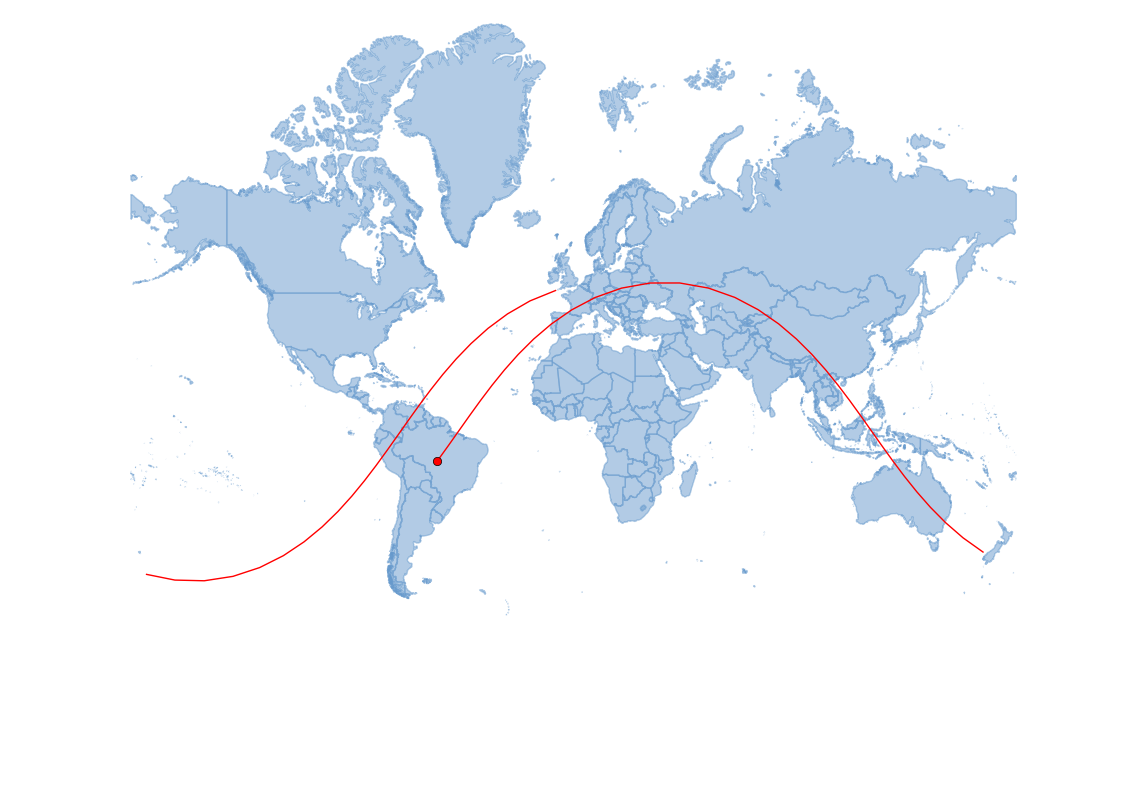

In [21]:
fig = plt.figure()
ax = fig.gca()
now = datetime.datetime.now(utc)

# Countries
for p in mercator:
    ax.add_patch(PolygonPatch(p, fc='#6699cc', ec='#6699cc', alpha=0.5, zorder=2))
    
trajectory(ax, now, iss)

# Finitions
ax.axis('scaled')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim((-2.5, 3))
fig.set_size_inches(20, 10)
ax.set_frame_on(False)

## Le terminateur 

Le terminateur est la ligne fictive et mobile qui sépare la face éclairée et la face illuminée de la Terre. On trouve sur la page [Wikipedia](https://fr.wikipedia.org/wiki/Terminateur) la formule qui donne ses coordonnées ainsi qu'une vidéo qui montre la traversée du terminateur par la station spatiale internationale. Cette formule prend en compte notamment la *déclinaison* du soleil à l'instant donné (équivalente à l'inclinaison de l'axe de rotation de la planète par rapport à l'écliptique).

La station spatiale internationale peut être visible sur Terre la nuit quand ses panneaux solaires reflètent les rayons solaires vers la Terre. Pour essayer de modéliser ce phénomène, nous allons nous pencher sur une série de définitions du crépuscule.

Le terminateur trace la ligne des points sur Terre qui voient le soleil sur l'horizon (élévation nulle), mais:

- on entre dans la *nuit civile* quand le soleil passe sous les -6°;
- on entre dans la *nuit aéronautique* quand le soleil passe sous les -12°;
- on entre dans la *nuit astronomique* quand le soleil passe sous les -18°.

Nous considérerons alors que la station spatiale internationale est visible de notre position actuelle si :

- elle passe à plus de 10° au dessus de notre horizon;
- le soleil est situé entre -6° et -18° sous notre horizon.

<div class="alert alert-warning">
**Exercice**: Ajouter le terminateur à l'instant courant sur la carte précédente.
</div>

**Bonus**: Ajouter les limites de nuits civile, aéronautique et astronomique.  
Ce bonus est intéressant mais n'empêche pas d'aller plus loin. On pourra comparer le résultat avec [cette carte](https://www.timeanddate.com/worldclock/sunearth.html).

In [41]:
def shade(dec, merc, max_=85):
    """Yields the terminator polygon."""
    yield prj.sph2merc(-180, -np.sign(dec)*max_)
    yield from zip(*merc)
    yield prj.sph2merc(180, -np.sign(dec)*max_)
    yield prj.sph2merc(-180, -np.sign(dec)*max_)

def terminator(ax, now, projection=prj.sph2merc):
    """Adds the terminator to current plot (Mercator)."""
    sun = planets['sun']
    lat, lon, _ = geo.cartesian_to_geodesic(*earth.at(ts.utc(now)).observe(sun).position.m)
    _, dec, _ = earth.at(ts.utc(now)).observe(sun).radec()
    
    # Greenwich hour angle
    #   => angle between the Greenwich meridian and the meridian containing the subsolar point
    tau = 15 * ts.utc(now).gmst - lon
    lons = np.linspace(-180, 180)
    
    # Solar terminator
    lats = np.degrees(np.arctan(-np.cos(np.radians(lons + tau))/np.tan(dec.radians)))

    def plus(altitude):
        return np.degrees(np.arcsin(np.sin(np.radians(altitude)) /
                                    np.sqrt(np.sin(dec.radians)**2 +
                                            (np.cos(dec.radians) * np.cos(np.radians(lons + tau)))**2)))
    
    lats6 = lats + plus(6.)
    lats12 = lats + plus(12.)
    lats18 = lats + plus(18.)

    p = Polygon(list(shade(dec.radians, projection(lons, lats))))
    ax.add_patch(PolygonPatch(p, fc='#cccccc', ec='#cccccc', alpha=0.25, zorder=1))

    p = Polygon(list(shade(dec.radians, projection(lons, lats6))))
    ax.add_patch(PolygonPatch(p, fc='#cccccc', ec='#cccccc', alpha=0.25, zorder=1))

    p = Polygon(list(shade(dec.radians, projection(lons, lats12))))
    ax.add_patch(PolygonPatch(p, fc='#cccccc', ec='#cccccc', alpha=0.25, zorder=1))

    p = Polygon(list(shade(dec.radians, projection(lons, lats18))))
    ax.add_patch(PolygonPatch(p, fc='#cccccc', ec='#cccccc', alpha=0.25, zorder=1))

/Users/xo/Library/virtualenv/python35/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in arcsin
/Users/xo/Library/virtualenv/python35/lib/python3.5/site-packages/geotools-1.0-py3.5.egg/geotools/projection.py:11: RuntimeWarning: invalid value encountered in log


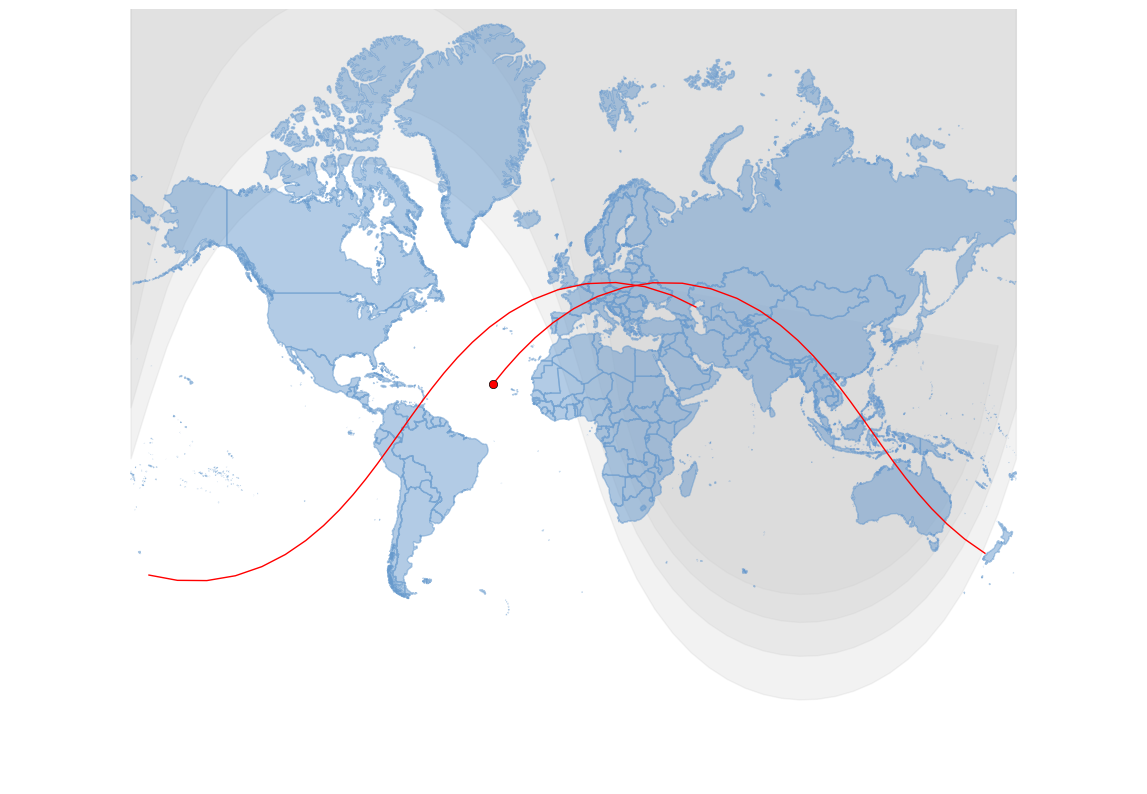

In [42]:
fig = plt.figure()
ax = fig.gca()
now = datetime.datetime.now(utc)

for p in mercator:
    ax.add_patch(PolygonPatch(p, fc='#6699cc', ec='#6699cc', alpha=0.5, zorder=2))

trajectory(ax, now, iss)
terminator(ax, now)

# Finitions
ax.axis('scaled')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim((-2.5, 3))
fig.set_size_inches(20, 10)
ax.set_frame_on(False)

## Prochains passage de l'ISS

<div class="alert alert-warning" style="margin-top: 1em">
**Exercice**: Afficher à un horizon d'une semaine les heures de passage de l'ISS au dessus de notre position actuelle et potentiellement visibles par réflection des rayons du Soleil sur la station.
</div>

<img src="img/iss_dusk.jpeg" style="width:10cm"/>


In [31]:
def passing_over(now, location, condition,
                 horizon=datetime.timedelta(days=7),
                 timestep=datetime.timedelta(minutes=2)):
    
    res = []
    prec_time = None
    msg = "{} : iss {:0.3f} deg ; sun {:0.3f} deg"
    sun = planets['sun']
    
    for k in range(int(horizon/timestep)): # 1 day = 720 minutes
        t = ts.utc(now + k * timestep)
        lat, lon, _ = geo.cartesian_to_geodesic(*iss.gcrs(t).position.m)
        iss_alt, _, _  = location.at(t).observe(iss).altaz()
        sun_alt, _, _ = location.at(t).observe(sun).apparent().altaz()
        if condition(iss_alt, sun_alt):
            time = t.astimezone(pytz.timezone('Europe/Paris'))
            if prec_time is None or (time - prec_time).seconds > 3600:
                res.append((time, iss_alt, sun_alt))
                print(msg.format(time.strftime("%Y-%m-%d %H:%M:%S"), iss_alt.degrees, sun_alt.degrees))
                prec_time = time
    return res

In [33]:
now = datetime.datetime.now(utc)
toulouse = earth.topos(43.629075, 1.363819)

def condition(iss_alt, sun_alt):
    return(iss_alt.degrees > 10 and sun_alt.degrees < -6 and sun_alt.degrees > -18)

visible = passing_over(now, toulouse, condition, horizon=datetime.timedelta(days=3))

2017-02-01 19:06:01 : iss 11.797 deg ; sun -11.188 deg
2017-02-03 18:58:01 : iss 11.430 deg ; sun -9.343 deg


<div class="alert alert-warning" style="margin-top: 1em">
**Exercice**: Choisir un des prochains passages visibles de l'ISS et afficher une carte d'Europe (Lambert 93) avec:
<ul>
<li>la trace au sol de l'ISS avec les heures de passage;</li>
<li>les différents terminateurs;</li>
<li>notre position actuelle sur la carte.</li>
</ul>
</div>

In [34]:
def europe_ext_map(projection, shapefile_path = shapefile_path):

    items = [p for p in fiona.open(shapefile_path)]
    polygons = []
    
    for i in items:
        if i['properties']['CNTR_ID'] in [
            'FR', # France
            'DE', 'IT', 'ES', # Germany, Italy, Spain
            'PT', 'UK', 'BE', # Portugal, United Kingdom, Belgium
            'CH', 'LU', 'AD', # Switzerland, Luxembourg, Andorra
            'NL', 'AT', 'LI', # Netherlands, Austria, Liechtenstein
            'CZ', 'PL', 'IE', # Czech Republic, Poland, Ireland
            'SK', 'SI', 'DK', # Slovakia, Slovenia, Denmark
            'HR', 'SE', 'HU', # Croatia, Sweden, Hungary
            'BA',             # Bosnia
        ]:
            s = shape(i['geometry'])
            if s.geom_type == "Polygon":
                s = MultiPolygon([s])
            for idx, p in enumerate(s):
                lon = np.array([lon for (lon, _) in list(p.exterior.coords)])
                lat = np.array([lat for (_, lat) in list(p.exterior.coords)])
                x, y = projection(lon, lat)
                if i['properties']['CNTR_ID'] == "FR":
                    polygons.append((Polygon([a for a in zip(x, y)]), {'fc':'#6699cc', 'ec':'#6699cc'}))
                else:
                    polygons.append((Polygon([a for a in zip(x, y)]), {'fc':'#cccccc', 'ec':'#aaaaaa'}))
    
    return polygons

def graticule(ax, longitude, latitude, projection, step=5):
    for lon in np.arange(longitude[0], longitude[1], step):
        lat_grat = np.arange(latitude[0], latitude[1])
        lon_grat = np.repeat(lon, len(lat_grat))
        x, y = projection(lon_grat, lat_grat)
        ax.add_line(plt.Line2D(x, y, color='#cccccc', alpha=0.5))

    for lat in np.arange(latitude[0], latitude[1], step):
        lon_grat = np.arange(longitude[0], longitude[1])
        lat_grat = np.repeat(lat, len(lon_grat))
        x, y = projection(lon_grat, lat_grat)
        ax.add_line(plt.Line2D(x, y, color='#cccccc', alpha=0.5))

In [35]:
# Compute a new track (and keep additional parameters)
VisiblePoint = namedtuple('VisiblePoint', ['lat', 'lon', 'iss_alt', 'iss_az', 'sun_alt', 'time', 'localtime'])

def visible_track(start, position):
    track = []
    sun = planets['sun']
    for k in range(60): # 10 minutes à 10 secondes
        t = ts.utc(start + k * datetime.timedelta(seconds=10))
        iss_alt, iss_az, _  = position.at(t).observe(iss).altaz()
        sun_alt, _, _ = position.at(t).observe(sun).apparent().altaz()
        lat, lon, _ = geo.cartesian_to_geodesic(*iss.gcrs(t).position.m)

        if iss_alt.degrees > 10:
            point = VisiblePoint(lat, lon - 15*t.gmst, iss_alt, iss_az, sun_alt, t,
                                 t.astimezone(pytz.timezone('Europe/Paris')).strftime("%d/%m/%Y %H:%M:%S"))
            track.append(point)
    return track
    
# Choose the most visible pass
choice = max(visible, key=lambda x: x[1].degrees)
# Compute the track of the pass over
track = visible_track(choice[0] - datetime.timedelta(minutes=3), toulouse)

/Users/xo/Library/virtualenv/python35/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in arcsin


Passage de l'ISS le 01/02/2017
Altitude maximum 68.61° à 19:09:01
Azimuth entre 245.85° (19:05:51) et 54.18° (19:12:11)


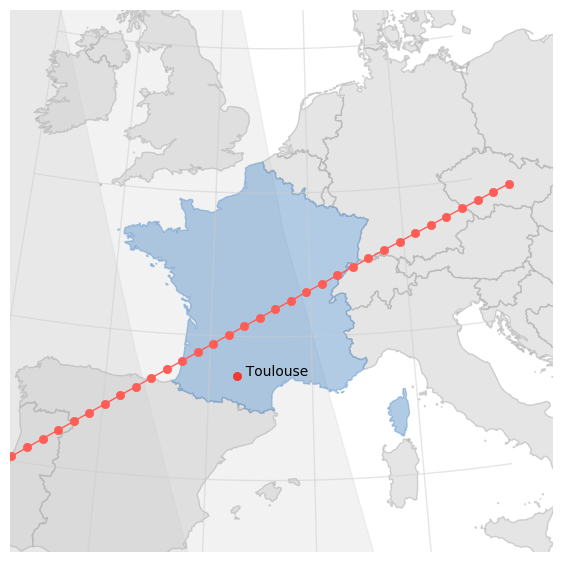

In [36]:
fig = plt.figure()
ax = fig.gca()

for p in europe_ext_map(prj.sph2lcc):
    ax.add_patch(PolygonPatch(p[0], alpha=0.5, zorder=2, **p[1]))

graticule(ax, (-10, 15), (30, 60), prj.sph2lcc)
terminator(ax, now, prj.sph2lcc)

# Where am I ?
ax.plot(*prj.sph2lcc(toulouse.longitude.degrees, toulouse.latitude.degrees),
        'o', color="#f13a31", markeredgecolor="#f13a31")
ax.annotate("  Toulouse", prj.sph2lcc(toulouse.longitude.degrees, toulouse.latitude.degrees))

# ISS
coords = np.array([(point.lon, point.lat) for point in track])
coords[:, 0] = np.degrees(np.angle(np.exp(1j*np.radians(coords[:, 0]))))
ax.plot(*prj.sph2lcc(coords[:, 0], coords[:, 1]),
        'o-', color="#ff5d55", markeredgecolor="#ff5d55")

# Finitions
ax.set_xlim((-320000, 1800000))
ax.set_ylim((5600000, 7700000))
ax.set_xticks([])
ax.set_yticks([])
fig.set_size_inches(7, 7)
ax.set_frame_on(False)

def str_hour(t):
    return t.astimezone(pytz.timezone('Europe/Paris')).strftime("%H:%M:%S")

def str_day(t):
    return t.astimezone(pytz.timezone('Europe/Paris')).strftime("%d/%m/%Y")

print("Passage de l'ISS le {}".format(str_day(track[0].time)))
print("Altitude maximum {:.2f}° à {}".format(
    *max((t.iss_alt.degrees, str_hour(t.time)) for t in track)))
print("Azimuth entre {:.2f}° ({}) et {:.2f}° ({})".format(
    track[0].iss_az.degrees, str_hour(track[0].time),
    track[-1].iss_az.degrees, str_hour(track[-1].time)))

## Bonus

<div class="alert alert-warning" style="margin-top: 1em">
**Exercice :** Calculer l'heure de la prise de vue suivante (et comparer le résultat avec la réponse sur le site).
</div>

La photo suivante a été prise dans la nuit du 13 au 14 janvier 2017 depuis le site l'ESA Madrid.  
L'anecdote est racontée [ici](http://www.esa.int/esl/ESA_in_your_country/Spain/La_ISS_a_la_luz_de_la_luna). On y apprend que le passage de l'ISS devant la Lune a duré 0,56 secondes !

Données :

- pour la taille de la Lune dans le ciel, on considère souvent qu'elle occupe un demi-degré angulaire ;

- les coordonnées GPS de l'[ESA Madrid](http://www.esa.int/About_Us/ESAC/Como_llegar_a_ESAC) :
`(40.4438, -3.9529)`

- la dernière TLE publiée le 13 janvier 2017 :


    1 25544U 98067A   17013.66453757  .00002774  00000-0  49270-4 0  9991
    2 25544  51.6436  88.6266 0007381  79.9762  16.7314 15.54061850 37728


<img src="img/iss_moon_crossing.jpeg" style="width:10cm" />

In [ ]:
# Date en question
now = datetime.datetime(2017, 1, 14, tzinfo=utc)

# Coordonnées GPS depuis leur site
esac_madrid = earth.topos(40.4438, -3.9529)

# Archives TLE
iss = earth.satellite("""
1 25544U 98067A   17013.66453757  .00002774  00000-0  49270-4 0  9991
2 25544  51.6436  88.6266 0007381  79.9762  16.7314 15.54061850 37728
""")

visible = passing_over(now, esac_madrid,
                       lambda iss_alt, sun_alt: iss_alt.degrees > 10,
                       horizon=datetime.timedelta(days=1),
                       timestep=datetime.timedelta(minutes=1))

In [ ]:
# Compute a new track (and keep additional parameters)
MoonPoint = namedtuple('MoonPoint',
                       ['iss_alt', 'iss_az', 'moon_alt', 'moon_az', 'localtime'])

def moon_track(start, position):
    track = []
    moon = planets['moon']
    for k in range(1200): # 10 minutes à 0.5 secondes
        t = ts.utc(start + k * datetime.timedelta(seconds=.5))
        iss_alt, iss_az, _  = position.at(t).observe(iss).altaz()
        moon_alt, moon_az, _ = position.at(t).observe(moon).apparent().altaz()

        if iss_alt.degrees > 10:
            point = MoonPoint(iss_alt, iss_az, moon_alt, moon_az,
                              t.astimezone(pytz.timezone('Europe/Madrid')).strftime("%H:%M:%S"))
            track.append(point)
    return track

# Compute the track of the pass over
track = moon_track(visible[0][0] - datetime.timedelta(minutes=3), esac_madrid)

In [ ]:
small_track = track[368:372]

fig = plt.figure()
ax = fig.gca()

plt.plot([t.iss_az.degrees for t in small_track],
         [t.iss_alt.degrees for t in small_track],
         '-o', color="#aaaaaa")

for t in small_track:
    c = plt.Circle((t.moon_az.degrees, t.moon_alt.degrees),
                   radius=0.25,  # pertinence du 0.25 ?
                   facecolor='#d4cf6a', edgecolor="#7d7813")
    ax.add_patch(c)
    ax.annotate(t.localtime, (t.iss_az.degrees, t.iss_alt.degrees + 0.1), )
    
ax.axis('scaled')
ax.set_xlim((154, 157.5))
ax.set_ylim((61, 63))
ax.set_frame_on(False)


## Annexe: calcul des différents niveaux de terminateur

Le calcul de l'élévation du soleil est donné par la formule suivante :

$$h_{sun} = \arcsin\left(\sin{\varphi} \cdot \sin{\delta_{sun}} + \cos{\varphi}\cdot\cos{\delta_{sun}}\cdot\cos\left(\lambda + \tau\right)\right)$$

avec:
- $\lambda$ la longitude du point courant;
- $\varphi$ la latitude du point courant;
- $\tau$ correspond à la différence (angle sidéral - longitude du point subsolaire).


Pour le terminateur simple, avec $h_{sun} = 0$:

\begin{eqnarray}
\sin{\varphi} \cdot \sin{\delta_{sun}} &=& -\cos{\varphi} \cdot \cos{\delta_{sun}} \cdot \cos\left(\lambda + \tau\right)\\
\tan{\varphi} &=& - \frac{\cos\left(\lambda + \tau\right)}{\tan{\delta_{sun}}}
\end{eqnarray}


Sinon, on peut réécrire l'équation

$$\sin{h_{sun}} = a \sin{\varphi} + b \cos{\varphi}$$

avec $a = \sin{\delta_{sun}}$ et $b = \cos{\delta_{sun}}\cos\left(\lambda + \tau\right)$.


On résout cette équation en posant:
$$y = \arctan\frac{b}{a} = \arctan\frac{\cos\left(\lambda + \tau\right)}{\tan\delta_{sun}}$$

Alors:

\begin{eqnarray}
\sin{h_{sun}} &=& a\sin{\varphi}+b\cos{\varphi}\\
&=& \sqrt{a^2+b^2}\left(\frac{a}{\sqrt{a^2+b^2}}\sin{\varphi}+\frac{b}{\sqrt{a^2+b^2}}\cos{\varphi}\right)\\
&=& \sqrt{a^2+b^2}\Big(\sin{\varphi}\cos{y}+\cos{\varphi}\sin{y}\Big)\\
&=& \sqrt{a^2+b^2}\sin(\varphi + y)
\end{eqnarray}



$$ \varphi = - \arctan\left(\dfrac{\cos\left(\lambda + \tau\right)}{\tan{\delta_{sun}}}\right) + \arcsin\left(\frac{\sin{h_{sun}}}{\sqrt{\sin^2 {\delta_{sun}} + \cos^2{\delta_{sun}}\cos^2 \left(\lambda + \tau\right)}}\right)$$